In [4]:
import librosa as librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa.display
import os

In [5]:
test_data_root = 'D:\DALI_extra'
sample_data = os.path.join(test_data_root, 'db', 'audio', 'wav', '237-134500-0000.wav')

# Size of the FFT, which will also be used as the window length
n_fft=2048

# Step or stride between windows. If the step is smaller than the window lenght, the windows will overlap
hop_length=512

# Load sample audio file
y, sr = librosa.load(sample_data)

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(
    y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window='hann')) ** 2

In [6]:
spectrogram_librosa_db = librosa.power_to_db(spectrogram_librosa, ref=np.max)

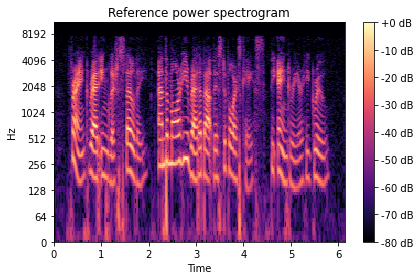

In [7]:
def show_spectrogram(spec, title, sr, hop_length, y_axis='log', x_axis='time'):
    librosa.display.specshow(spec, sr=sr, y_axis=y_axis, x_axis=x_axis, hop_length=hop_length)
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

show_spectrogram(spectrogram_librosa_db, 'Reference power spectrogram', sr, hop_length)

In [22]:
from nvidia.dali import pipeline_def
import nvidia.dali.fn as fn
import nvidia.dali.types as types
import nvidia.dali as dali

audio_data = np.array(y, dtype=np.float32)

@pipeline_def
def spectrogram_pipe(nfft, window_length, window_step, device='cpu'):
    audio = types.Constant(device=device, value=audio_data)
    spectrogram = fn.spectrogram(audio, device=device, nfft=nfft,
                                 window_length=window_length,
                                 window_step=window_step)
    return spectrogram

ModuleNotFoundError: No module named 'nvidia'

In [26]:
!pip install nvidia-pyindex
!pip install nvidia-dali

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\AppData\Local\Programs\Python\Python38\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-8ajo2h35\\nvidia-dali_2709e20087fc48fdb04d957edcd263b5\\setup.py'"'"'; __file__='"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-8ajo2h35\\nvidia-dali_2709e20087fc48fdb04d957edcd263b5\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-pip-egg-info-vqyz97o5'
       cwd: C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-install-8ajo2h35\nvidia-dali_2709e20087fc48fdb04d957edcd263b5\
  Complete output (18 lines):
  Traceback (most


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'



  ###########################################################################################
  ----------------------------------------
  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\AppData\Local\Programs\Python\Python38\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-8ajo2h35\\nvidia-dali_ee38e1af85c1498ab1ee2f6f693ae84e\\setup.py'"'"'; __file__='"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-8ajo2h35\\nvidia-dali_ee38e1af85c1498ab1ee2f6f693ae84e\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-pip-egg-info-4m5sy1hw'
       cwd: C:\Users\Public\Docume